# Task 1 : Data Exploration and Preprocessing

Number of rows: 9551
Number of columns: 21
Missing values in each column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


C:\Users\AFZAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


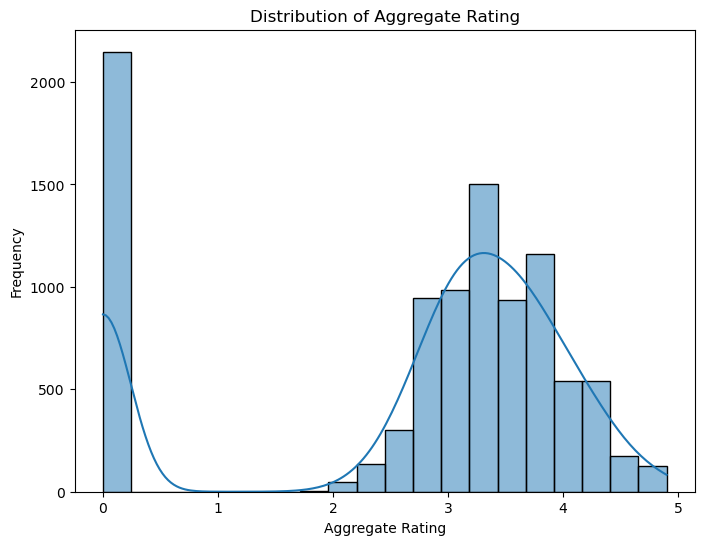

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Dataset .csv')

num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

plt.figure(figsize=(8, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()



# Task 2 : Descriptive Analysis

In [2]:
import pandas as pd
data = pd.read_csv('Dataset .csv')

numerical_columns = data.select_dtypes(include=['int64', 'float64'])
basic_statistics = numerical_columns.describe()
print("Basic Statistics for Numerical Columns:\n", basic_statistics)

categorical_variables = ['Country Code', 'City', 'Cuisines']
for col in categorical_variables:
    print("Distribution of", col)
    print(data[col].value_counts())
    print()

top_cuisines = data['Cuisines'].value_counts().head(10)
print("Top Cuisines:\n", top_cuisines)

top_cities = data['City'].value_counts().head(10)
print("Top Cities:\n", top_cities)

Basic Statistics for Numerical Columns:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%    

# Task 3 : Geospatial Analysis

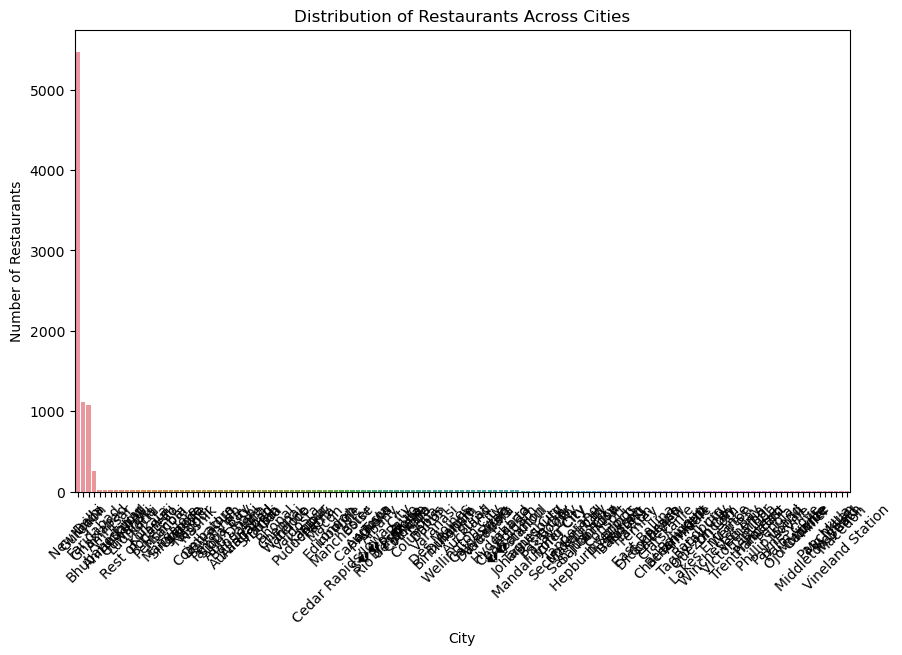

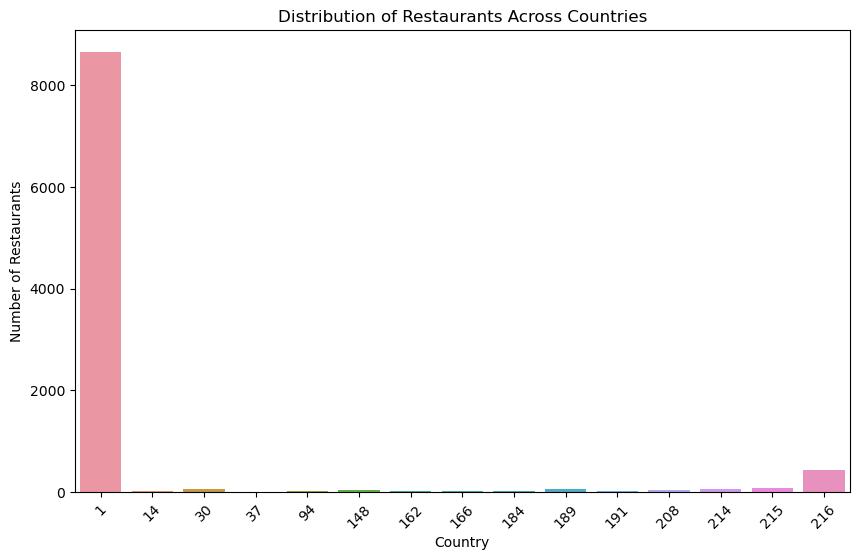

                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


In [3]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Dataset .csv')
m = folium.Map(location=[0, 0], zoom_start=2)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(marker_cluster)

m.save('restaurant_map.html')

city_distribution = df['City'].value_counts()
country_distribution = df['Country Code'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants Across Cities')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=country_distribution.index, y=country_distribution.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants Across Countries')
plt.show()

correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print(correlation)